In [3]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [4]:
def min_max_normalization(x,lst,i): #검정색일 수록 높은 숫자이도록
    return 255 - int(( (x-min(lst[i]))/(max(lst[i]) - min(lst[i])) )*255)


#def function_name(var_name: var_type) -> return_type:
''' csv 파일을 넣으면 당일날 포함 과거 7개의 데이터를 layered한 데이터를 return 해준다
단, 첫번째에서 6번째까지는 과거의 기록이 없기에 그냥 같은 층으로 연장시켜 준다 (17, 14) 사이즈로'''
'''So please unpacking this function in two img and label'''
def make_layered_img(correct_file_name : str) -> list: #return이 list두개임
    row_data_frame = pd.read_csv("./"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    row_data_frame.columns = ['label',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #string -> int
    #Normalization 해주고 255 픽셀화를 해주자
    data_set = []
    for idx in row_data_frame.index:
        data_set.append([])
        for time in row_data_frame.columns[1:]: #아래 방향으로 뽑아냄    
            data_set[idx].append(row_data_frame[time][idx])
    
    for lst_num in range (0,len(data_set)):
        #print(lst_num)<- error가 날때 검사용 
        data_set[lst_num] = list(map(lambda x: min_max_normalization(x,data_set,lst_num), data_set[lst_num])) 
    
    #에러 방지 코드
    if len(row_data_frame["label"]) != len(data_set):
        print('The make_layer_img has errors So, return [""],[""] ')
        return [], []
    else:
        print(" The make_layer_img function Successfully already, now make img \n")        
        print(len(data_set))
    # layered img를 만들어주자
    img_lst = []
    label_lst = []
    for data_idx in range (0, len(data_set)):
        #print(data_idx)
        tmp_img = [] #방을 만들어주기
        
        #먼저 예외 처리 (과거의 데이터가 5개가 되지 않을 경우)
        if data_idx < 6: # 0~ 5 -> 최대 개수 5일때 6개
            for _ in range (0,14):
                tmp_img.append(data_set[data_idx])
            
        else:
            #이 부분에서 데이터가 한개가 빠짐
            if data_idx == len(data_set)-1: #마지막놈은 다음 놈의 label이없으니깐
                                          #<- 애초에 이미지 데이터를 만들지 않겠다
                print("The length of img : ", len(img_lst), "The length of label label", len(label_lst))
                print("Success for makinng img and label \nSo please unpacking with img,label")
                return np.array(img_lst),np.array(label_lst) # 함수가 끝나는 지점 
                    
            for di in range (data_idx-6,data_idx+1): # data_idx -6 ~ data_idx 까지
                #같은 레이어 두개씩 쌓기
                tmp_img.append(data_set[di])
                tmp_img.append(data_set[di]) 
                 
                
        label_lst.append(row_data_frame["label"][data_idx+1]) #다음녀석의 label을 idx로 사용
        img_lst.append(np.array(tmp_img))
        
    return print("Something is Wrong with make_layered img") #위에 if문에 걸리지 않았음

In [5]:
img_set,label_set = make_layered_img("correct_data")
real_label_name, count = np.unique(label_set,return_counts = True) #진짜 label명을 따로 저장하기 [0~13]으로 이름 다시 매길거여서

 The make_layer_img function Successfully already, now make img 

1782
The length of img :  1781 The length of label label 1781
Success for makinng img and label 
So please unpacking with img,label


# 모델을 위해 데이터를 가공시키기 X-> 픽셀화 Y-> 카테고리화

In [8]:
#X를 픽셀화 시켜주기
print("\n------------------------------ X Pixelization (",len(img_set),",14,17,1) ------------------------------\n")
X_set = img_set.reshape(len(img_set),14,17,1)
print(X_set[6][:3])

#Y를 categorical 
print("\n---------------------------------- Y Categorical ----------------------------------\n")
model_label_set = []
for i in range (0,len(label_set)):
    if label_set[i] == 6:
        model_label_set.append(0)
    else:
        model_label_set.append(label_set[i]-7)
a, count = np.unique(model_label_set,return_counts = True)
b, count2 = np.unique(label_set,return_counts = True)


print("Before Categorical : ",model_label_set[0])
from tensorflow.keras.utils import to_categorical
Y_set = to_categorical(model_label_set, 14)
print("After Categorical : ", Y_set[0])
print("Real_time_set     : ",b)
print("model_label_set  : ",a)


------------------------------ X Pixelization ( 1781 ,14,17,1) ------------------------------

[[[255]
  [247]
  [228]
  [184]
  [159]
  [141]
  [128]
  [ 69]
  [ 32]
  [  0]
  [ 20]
  [ 48]
  [ 74]
  [ 54]
  [ 77]
  [128]
  [184]]

 [[255]
  [247]
  [228]
  [184]
  [159]
  [141]
  [128]
  [ 69]
  [ 32]
  [  0]
  [ 20]
  [ 48]
  [ 74]
  [ 54]
  [ 77]
  [128]
  [184]]

 [[255]
  [224]
  [227]
  [169]
  [124]
  [111]
  [ 49]
  [ 50]
  [ 47]
  [  0]
  [ 41]
  [123]
  [157]
  [161]
  [197]
  [209]
  [238]]]

---------------------------------- Y Categorical ----------------------------------

Before Categorical :  8
After Categorical :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Real_time_set     :  [ 6  8  9 10 11 12 13 14 15 16 17 18 19 20]
model_label_set  :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


# 데이터 검증

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


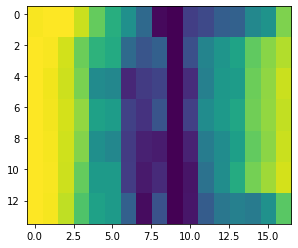

In [9]:
#실제 그림에서 찾고 싶으면 x축에 6을 더하고 (6~22 -> 0~16) 7을 빼주면(8~20 -> 1~13) 된다, 즉 x에서 -1을 해주면 label이 나온다
print(Y_set[10])
plt.imshow(X_set[10])#,cmap= "gray")

#즉 이 경우 9 이므로 다음 놈이 10에서 가장 찐할 것이다 이 그림의 맨 밑이랑 상관 x

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


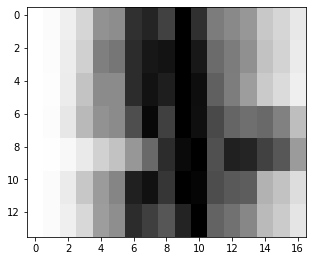

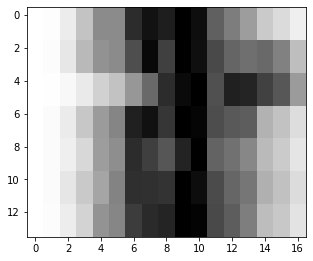

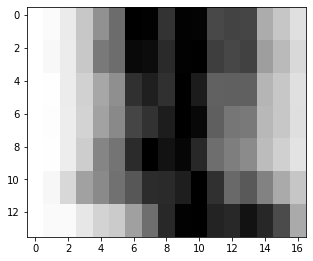

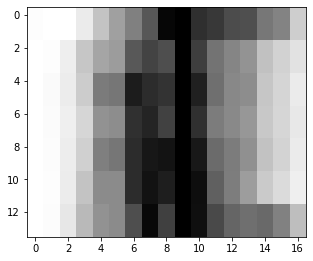

In [19]:
#실제 그림에서 찾고 싶으면 x축에 6을 더하고 (6~22 -> 0~16) 7을 빼주면(8~20 -> 1~13) 된다, 즉 x에서 -1을 해주면 label이 나온다
print(Y_set[10])
plt.figure(figsize = (5,5))
plt.imshow(X_set[13],cmap= "gray")
plt.figure(figsize = (5,5))
plt.imshow(X_set[15],cmap= "gray")
plt.figure(figsize = (5,5))
plt.imshow(X_set[200],cmap= "gray")
plt.figure(figsize = (5,5))
plt.imshow(X_set[10],cmap= "gray")
#즉 이 경우 9 이므로 다음 놈이 10에서 가장 찐할 것이다 이 그림의 맨 밑이랑 상관 x

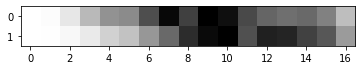

In [10]:
plt.imshow(X_set[11][11:13],cmap= "gray")

In [11]:
X_set[11][13] 

array([[255],
       [254],
       [248],
       [234],
       [209],
       [194],
       [151],
       [105],
       [ 45],
       [ 10],
       [  0],
       [ 80],
       [ 33],
       [ 37],
       [ 66],
       [ 87],
       [155]])

# Train과 Test set 나누기

In [12]:
if (len(X_set) == len(Y_set)): #나누기전에 확인하는 조건 
    
    ######################
    PER_TRAIN = 0.8 #Train 과 Test 8:2 로 나누겠다는 소리
    ######################
    
    X_train, Y_train = X_set[:int(len(X_set)*PER_TRAIN)], Y_set[:int(len(X_set)*PER_TRAIN)]
    X_test, Y_test = X_set[int(len(X_set)*PER_TRAIN):], Y_set[int(len(X_set)*PER_TRAIN):]
    print(len(X_train),len(Y_train),len(X_test),len(Y_test))

1424 1424 357 357


In [13]:
print(X_train.shape)
print(Y_train.shape)

(1424, 14, 17, 1)
(1424, 14)


# Model 만들기

In [14]:
img_height = 15
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())

model.add(layers.Dense(14, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 15, 17, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 15, 17, 16)        160       
                                                                 
 batch_normalization_1 (Batc  (None, 15, 17, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 17, 32)        4640      
                                                                 
 batch_normalization_2 (Batc  (None, 15, 17, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
#전체 1424 개
classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)